<a href="https://colab.research.google.com/github/danemiles/projects/blob/main/FF_Draft_Prep_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Editable Variables & Setup**

---



a. Projections

In [96]:
# LEAGUE VARIABLES
teams = 12
starting_qb = 1
starting_rb = 2
starting_wr = 2
starting_te = 1
starting_flex = 2
bench = 7

# scoring
rush_yd = 0.1
rush_td = 6
fumb = -2

ppr = 1
rec_yd = 0.1
rec_td = 6

p_yd = 0.04
p_td = 6
pick = -2

ret_td = 6


######
# calc starters by pos
lst_qb = teams*starting_qb
lst_rb = teams*starting_rb
lst_wr = teams*starting_wr
lst_te = teams*starting_te
lst_flex = teams*starting_flex

In [97]:
# ! pip install sportsipy

In [98]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import lxml.html as lh


In [99]:
url='https://betiq.teamrankings.com/fantasy-football/rankings/yahoo/?size=10'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [100]:
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')

# Obtain information from tag <table>
table1 = soup.find('table', id='fantasy-table')

# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
 title = i.text
 headers.append(title)

headers
#rank appears to be the first true header


['Projections last updated: Aug 15, 2023',
 'Passing',
 'Rushing',
 'Receiving',
 'Fantasy',
 'Rank',
 'Player',
 'Pos',
 'Team',
 'Bye',
 'Yds',
 'TD',
 'Int',
 'Yds',
 'TD',
 'Rec',
 'Yds',
 'TD',
 'FPts',
 'Value']

In [101]:
#drop header values before 'Rank'
del headers[:5]
headers

['Rank',
 'Player',
 'Pos',
 'Team',
 'Bye',
 'Yds',
 'TD',
 'Int',
 'Yds',
 'TD',
 'Rec',
 'Yds',
 'TD',
 'FPts',
 'Value']

In [102]:
#make the dataframe
mydata = pd.DataFrame(columns = headers)

mydata

,Rank,Player,Pos,Team,Bye,Yds,TD,Int,Yds,TD,Rec,Yds,TD,FPts,Value


In [103]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[2:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row

In [104]:
#check accuracy
mydata

,Rank,Player,Pos,Team,Bye,Yds,TD,Int,Yds,TD,Rec,Yds,TD,FPts,Value
0,1,Christian McCaffrey,RB1,SF,9,0,0.0,0.0,919,7.4,71,566,3.1,246.9,155.1
1,2,Austin Ekeler,RB2,LAC,5,0,0.0,0.0,786,6.4,74,586,4.3,238.3,146.5
2,3,Justin Jefferson,WR1,MIN,13,0,0.0,0.0,17,0.4,104,1434,8.9,252.7,139.6
3,4,Bijan Robinson,RB3,ATL,11,0,0.0,0.0,1146,8.4,38,331,1.8,227.9,136.1
4,5,Ja'Marr Chase,WR2,CIN,7,0,0.0,0.0,14,0.1,101,1347,9.9,246.5,133.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,Isaiah Spiller,RB74,LAC,5,0,0.0,0.0,206,1.8,16,116,0.6,54.7,-37.1
296,297,Ameer Abdullah,RB75,LV,13,0,0.0,0.0,126,0.8,25,198,0.8,54.2,-37.6
297,298,Chase Claypool,WR90,CHI,13,0,0.0,0.0,30,0.2,29,391,2.9,75.3,-37.8
298,298,Daniel Bellinger,TE42,NYG,13,0,0.0,0.0,0,0.0,28,274,2.1,53.8,-37.8


In [105]:
#fix duplicate header names.
#source: https://stackoverflow.com/questions/40774787/renaming-columns-in-a-pandas-dataframe-with-duplicate-column-names

class renamer():
  def __init__(self):
    self.d = dict()

  def __call__(self, x):
    if x not in self.d:
      self.d[x] = 0
      return x
    else:
      self.d[x] += 1
      return "%s_%d" % (x, self.d[x])

mydata = mydata.rename(columns=renamer())
mydata

#here, sections are PASSING, RUSHING, RECEIVING

,Rank,Player,Pos,Team,Bye,Yds,TD,Int,Yds_1,TD_1,Rec,Yds_2,TD_2,FPts,Value
0,1,Christian McCaffrey,RB1,SF,9,0,0.0,0.0,919,7.4,71,566,3.1,246.9,155.1
1,2,Austin Ekeler,RB2,LAC,5,0,0.0,0.0,786,6.4,74,586,4.3,238.3,146.5
2,3,Justin Jefferson,WR1,MIN,13,0,0.0,0.0,17,0.4,104,1434,8.9,252.7,139.6
3,4,Bijan Robinson,RB3,ATL,11,0,0.0,0.0,1146,8.4,38,331,1.8,227.9,136.1
4,5,Ja'Marr Chase,WR2,CIN,7,0,0.0,0.0,14,0.1,101,1347,9.9,246.5,133.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,Isaiah Spiller,RB74,LAC,5,0,0.0,0.0,206,1.8,16,116,0.6,54.7,-37.1
296,297,Ameer Abdullah,RB75,LV,13,0,0.0,0.0,126,0.8,25,198,0.8,54.2,-37.6
297,298,Chase Claypool,WR90,CHI,13,0,0.0,0.0,30,0.2,29,391,2.9,75.3,-37.8
298,298,Daniel Bellinger,TE42,NYG,13,0,0.0,0.0,0,0.0,28,274,2.1,53.8,-37.8


In [106]:
# mydata.dtypes #check data types ... likely has char/object values
test = mydata
test = test.replace('--',0)

test['Bye'] = test['Bye'].astype(int, errors='raise')

In [107]:
conv_to_float = ['Yds','TD','Int','Yds_1','TD_1','Rec','Yds_2','TD_2','FPts','Value'] # cols to be transformed to float

# run loop to change strings to float
for i in conv_to_float:
  test[i] = test[i].astype(float,errors='raise')

test.info() # check for completion

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    300 non-null    object 
 1   Player  300 non-null    object 
 2   Pos     300 non-null    object 
 3   Team    300 non-null    object 
 4   Bye     300 non-null    int64  
 5   Yds     300 non-null    float64
 6   TD      300 non-null    float64
 7   Int     300 non-null    float64
 8   Yds_1   300 non-null    float64
 9   TD_1    300 non-null    float64
 10  Rec     300 non-null    float64
 11  Yds_2   300 non-null    float64
 12  TD_2    300 non-null    float64
 13  FPts    300 non-null    float64
 14  Value   300 non-null    float64
dtypes: float64(10), int64(1), object(4)
memory usage: 37.5+ KB


In [108]:
df = test
df

,Rank,Player,Pos,Team,Bye,Yds,TD,Int,Yds_1,TD_1,Rec,Yds_2,TD_2,FPts,Value
0,1,Christian McCaffrey,RB1,SF,9,0.0,0.0,0.0,919.0,7.4,71.0,566.0,3.1,246.9,155.1
1,2,Austin Ekeler,RB2,LAC,5,0.0,0.0,0.0,786.0,6.4,74.0,586.0,4.3,238.3,146.5
2,3,Justin Jefferson,WR1,MIN,13,0.0,0.0,0.0,17.0,0.4,104.0,1434.0,8.9,252.7,139.6
3,4,Bijan Robinson,RB3,ATL,11,0.0,0.0,0.0,1146.0,8.4,38.0,331.0,1.8,227.9,136.1
4,5,Ja'Marr Chase,WR2,CIN,7,0.0,0.0,0.0,14.0,0.1,101.0,1347.0,9.9,246.5,133.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,Isaiah Spiller,RB74,LAC,5,0.0,0.0,0.0,206.0,1.8,16.0,116.0,0.6,54.7,-37.1
296,297,Ameer Abdullah,RB75,LV,13,0.0,0.0,0.0,126.0,0.8,25.0,198.0,0.8,54.2,-37.6
297,298,Chase Claypool,WR90,CHI,13,0.0,0.0,0.0,30.0,0.2,29.0,391.0,2.9,75.3,-37.8
298,298,Daniel Bellinger,TE42,NYG,13,0.0,0.0,0.0,0.0,0.0,28.0,274.0,2.1,53.8,-37.8


In [109]:
# create new projected points based on previously entered league settings

df["ProjPts"] = (
  (df["Yds"]*p_yd) +
  (df["TD"]*p_td) +
  (df["Int"]*pick) +
  (df["Yds_1"]*rush_yd) +
  (df["TD_1"]*rush_td) +
  (df["Rec"]*ppr) +
  (df["Yds_2"]*rec_yd) +
  (df["TD_2"]*rec_td)
)

# create new position / rank field
df['Pos_old'] = df['Pos']
df['Pos'] = df.Pos.str[:2] # take left two chars

df

,Rank,Player,Pos,Team,Bye,Yds,TD,Int,Yds_1,TD_1,Rec,Yds_2,TD_2,FPts,Value,ProjPts,Pos_old
0,1,Christian McCaffrey,RB,SF,9,0.0,0.0,0.0,919.0,7.4,71.0,566.0,3.1,246.9,155.1,282.5,RB1
1,2,Austin Ekeler,RB,LAC,5,0.0,0.0,0.0,786.0,6.4,74.0,586.0,4.3,238.3,146.5,275.4,RB2
2,3,Justin Jefferson,WR,MIN,13,0.0,0.0,0.0,17.0,0.4,104.0,1434.0,8.9,252.7,139.6,304.9,WR1
3,4,Bijan Robinson,RB,ATL,11,0.0,0.0,0.0,1146.0,8.4,38.0,331.0,1.8,227.9,136.1,246.9,RB3
4,5,Ja'Marr Chase,WR,CIN,7,0.0,0.0,0.0,14.0,0.1,101.0,1347.0,9.9,246.5,133.4,297.1,WR2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,Isaiah Spiller,RB,LAC,5,0.0,0.0,0.0,206.0,1.8,16.0,116.0,0.6,54.7,-37.1,62.6,RB74
296,297,Ameer Abdullah,RB,LV,13,0.0,0.0,0.0,126.0,0.8,25.0,198.0,0.8,54.2,-37.6,67.0,RB75
297,298,Chase Claypool,WR,CHI,13,0.0,0.0,0.0,30.0,0.2,29.0,391.0,2.9,75.3,-37.8,89.7,WR90
298,298,Daniel Bellinger,TE,NYG,13,0.0,0.0,0.0,0.0,0.0,28.0,274.0,2.1,53.8,-37.8,68.0,TE42


In [110]:
# make positional ranking column

df['Pos_rnk'] = df.groupby('Pos')['ProjPts'].rank(ascending=False)
df['Pos_rnk'] = df['Pos_rnk'].astype(int,errors='raise') # convert to int
df['Rnk'] = df['Pos'] + df['Pos_rnk'].astype(str)
#df['Rank'] = df['ProjPts'].rank(ascending=False)

df.head(12)


,Rank,Player,Pos,Team,Bye,Yds,TD,Int,Yds_1,TD_1,Rec,Yds_2,TD_2,FPts,Value,ProjPts,Pos_old,Pos_rnk,Rnk
0,1,Christian McCaffrey,RB,SF,9,0.0,0.0,0.0,919.0,7.4,71.0,566.0,3.1,246.9,155.1,282.5,RB1,1,RB1
1,2,Austin Ekeler,RB,LAC,5,0.0,0.0,0.0,786.0,6.4,74.0,586.0,4.3,238.3,146.5,275.4,RB2,2,RB2
2,3,Justin Jefferson,WR,MIN,13,0.0,0.0,0.0,17.0,0.4,104.0,1434.0,8.9,252.7,139.6,304.9,WR1,1,WR1
3,4,Bijan Robinson,RB,ATL,11,0.0,0.0,0.0,1146.0,8.4,38.0,331.0,1.8,227.9,136.1,246.9,RB3,3,RB3
4,5,Ja'Marr Chase,WR,CIN,7,0.0,0.0,0.0,14.0,0.1,101.0,1347.0,9.9,246.5,133.4,297.1,WR2,3,WR3
5,6,Tyreek Hill,WR,MIA,10,0.0,0.0,0.0,33.0,0.6,102.0,1344.0,8.9,245.4,132.3,296.7,WR3,4,WR4
6,7,Cooper Kupp,WR,LAR,10,0.0,0.0,0.0,41.0,0.4,108.0,1285.0,9.2,244.3,131.2,298.2,WR4,2,WR2
7,8,Nick Chubb,RB,CLE,5,0.0,0.0,0.0,1232.0,9.5,26.0,218.0,1.0,221.1,129.3,234.0,RB4,6,RB6
8,9,Tony Pollard,RB,DAL,7,0.0,0.0,0.0,983.0,8.1,44.0,358.0,2.0,216.7,124.9,238.7,RB5,4,RB4
9,10,Travis Kelce,TE,KC,10,0.0,0.0,0.0,8.0,0.4,95.0,1180.0,9.9,227.9,122.7,275.6,TE1,1,TE1


b. Avg Draft Position (ADP)

---



In [111]:
# source: https://www.fantasypros.com/nfl/adp/ppr-overall.php
url='https://www.fantasypros.com/nfl/adp/ppr-overall.php'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [112]:
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')

# Obtain information from tag <table>
table1 = soup.find('table', id='data')

# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
 title = i.text
 headers.append(title)

headers



['Rank',
 'Player Team (Bye)',
 'POS',
 'ESPN',
 'Sleeper',
 'NFL',
 'RTSports',
 'FFC',
 'AVG']

In [113]:
# make the dataframe
adp = pd.DataFrame(columns = headers)

adp

,Rank,Player Team (Bye),POS,ESPN,Sleeper,NFL,RTSports,FFC,AVG


In [114]:
# Create a for loop to fill adp
for j in table1.find_all('tr')[1:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(adp)
 adp.loc[length] = row

adp.head()

,Rank,Player Team (Bye),POS,ESPN,Sleeper,NFL,RTSports,FFC,AVG
0,1,Justin Jefferson MIN (13),WR1,1,1,1,1,,1.0
1,2,Christian McCaffrey SF (9),RB1,4,2,2,2,,2.5
2,3,Ja'Marr Chase CIN (7),WR2,2,3,4,3,,3.0
3,4,Austin Ekeler LAC (5),RB2,3,4,3,4,,3.5
4,5,Travis Kelce KC (10),TE1,5,5,6,8,,6.0


In [115]:
# need to split player name / team name / bye into separate cols

# where POS ne "DST"
#   Find "(", go left some amount?  = playername
#   etc
# where POS eq "DST", Find "(", trim to there

In [116]:
# for sake of trying, parse table in Pandas, not with BS4
url = 'https://www.fantasypros.com/nfl/adp/ppr-overall.php'
tables = pd.read_html(url) # Returns list of all tables on page
adp_2 = tables[0] # Select table of interest
adp_2

# significantly cleaner and easier... will remember moving fwd

,Rank,Player Team (Bye),POS,ESPN,Sleeper,NFL,RTSports,FFC,AVG
0,1,Justin Jefferson MIN (13),WR1,1.0,1.0,1.0,1.0,NaN,1.0
1,2,Christian McCaffrey SF (9),RB1,4.0,2.0,2.0,2.0,NaN,2.5
2,3,Ja'Marr Chase CIN (7),WR2,2.0,3.0,4.0,3.0,NaN,3.0
3,4,Austin Ekeler LAC (5),RB2,3.0,4.0,3.0,4.0,NaN,3.5
4,5,Travis Kelce KC (10),TE1,5.0,5.0,6.0,8.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...
560,561,Kellen Mond CLE (5),QB87,496.0,NaN,NaN,NaN,NaN,496.0
561,562,Nick Mullens MIN (13),QB88,497.0,NaN,NaN,NaN,NaN,497.0
562,563,Josh Johnson BAL (13),QB89,498.0,NaN,NaN,NaN,NaN,498.0
563,564,Myles Gaskin MIA (10),RB125,499.0,NaN,NaN,NaN,NaN,499.0


**2. Creating VORP, VBD**

---


In [117]:
# how many starters in league by position (total). Dub xhat_pos
# take proj tot pts for each player, proj_pts - xhat_pos = VORP

In [118]:
df.head()

,Rank,Player,Pos,Team,Bye,Yds,TD,Int,Yds_1,TD_1,Rec,Yds_2,TD_2,FPts,Value,ProjPts,Pos_old,Pos_rnk,Rnk
0,1,Christian McCaffrey,RB,SF,9,0.0,0.0,0.0,919.0,7.4,71.0,566.0,3.1,246.9,155.1,282.5,RB1,1,RB1
1,2,Austin Ekeler,RB,LAC,5,0.0,0.0,0.0,786.0,6.4,74.0,586.0,4.3,238.3,146.5,275.4,RB2,2,RB2
2,3,Justin Jefferson,WR,MIN,13,0.0,0.0,0.0,17.0,0.4,104.0,1434.0,8.9,252.7,139.6,304.9,WR1,1,WR1
3,4,Bijan Robinson,RB,ATL,11,0.0,0.0,0.0,1146.0,8.4,38.0,331.0,1.8,227.9,136.1,246.9,RB3,3,RB3
4,5,Ja'Marr Chase,WR,CIN,7,0.0,0.0,0.0,14.0,0.1,101.0,1347.0,9.9,246.5,133.4,297.1,WR2,3,WR3


In [119]:
qbs = df.loc[df['Pos'] == 'QB']
rbs = df.loc[df['Pos'] == 'RB']
wrs = df.loc[df['Pos'] == 'WR']
tes = df.loc[df['Pos'] == 'TE']

rp_qb = round(qbs.ProjPts.nlargest(teams*starting_qb).iloc[-1],1)
rp_rb = round(rbs.ProjPts.nlargest(teams*starting_rb).iloc[-1],1)
rp_wr = round(wrs.ProjPts.nlargest(teams*starting_wr).iloc[-1],1)
rp_te = round(tes.ProjPts.nlargest(teams*starting_te).iloc[-1],1)

print(rp_qb, rp_rb, rp_wr, rp_te)

328.4 155.2 198.8 128.4


In [120]:
df['RP'] = np.where(df['Pos']=='RB', rp_rb,
                   np.where(df['Pos']=='QB', rp_qb,
                   np.where(df['Pos']=='WR', rp_wr, rp_te)))

df['VORP'] = df['ProjPts'] - df['RP']

df.head()

,Rank,Player,Pos,Team,Bye,Yds,TD,Int,Yds_1,TD_1,...,Yds_2,TD_2,FPts,Value,ProjPts,Pos_old,Pos_rnk,Rnk,RP,VORP
0,1,Christian McCaffrey,RB,SF,9,0.0,0.0,0.0,919.0,7.4,...,566.0,3.1,246.9,155.1,282.5,RB1,1,RB1,155.2,127.3
1,2,Austin Ekeler,RB,LAC,5,0.0,0.0,0.0,786.0,6.4,...,586.0,4.3,238.3,146.5,275.4,RB2,2,RB2,155.2,120.2
2,3,Justin Jefferson,WR,MIN,13,0.0,0.0,0.0,17.0,0.4,...,1434.0,8.9,252.7,139.6,304.9,WR1,1,WR1,198.8,106.1
3,4,Bijan Robinson,RB,ATL,11,0.0,0.0,0.0,1146.0,8.4,...,331.0,1.8,227.9,136.1,246.9,RB3,3,RB3,155.2,91.7
4,5,Ja'Marr Chase,WR,CIN,7,0.0,0.0,0.0,14.0,0.1,...,1347.0,9.9,246.5,133.4,297.1,WR2,3,WR3,198.8,98.3


In [121]:
# remove unneeded cols
df = df.drop(columns=['Yds', 'TD','Int','Yds_1','TD_1','Rec','Yds_2','TD_2','FPts','Value'])

# let's also remove defense and kickers
values = ['DS','K1','K2','K3','K4','K5','K6','K7','K8','K9']

#drop rows that contain any value in the list
df = df[df.Pos.isin(values) == False]

In [122]:
# add VORP rankings, total and by Pos
df['VORP_rnk_pos'] = df.groupby('Pos')['VORP'].rank(ascending=False).astype(int,errors='raise')

df['VORP_rnk_tot'] = df['VORP'].rank(ascending=False).astype(int,errors='raise')
df.head()

,Rank,Player,Pos,Team,Bye,ProjPts,Pos_old,Pos_rnk,Rnk,RP,VORP,VORP_rnk_pos,VORP_rnk_tot
0,1,Christian McCaffrey,RB,SF,9,282.5,RB1,1,RB1,155.2,127.3,1,2
1,2,Austin Ekeler,RB,LAC,5,275.4,RB2,2,RB2,155.2,120.2,2,3
2,3,Justin Jefferson,WR,MIN,13,304.9,WR1,1,WR1,198.8,106.1,1,5
3,4,Bijan Robinson,RB,ATL,11,246.9,RB3,3,RB3,155.2,91.7,3,11
4,5,Ja'Marr Chase,WR,CIN,7,297.1,WR2,3,WR3,198.8,98.3,3,8


In [123]:
# Time for analysis. Let's see who the top players are by total VORP
df.sort_values(by='VORP_rnk_tot', ascending=True).head(10)

,Rank,Player,Pos,Team,Bye,ProjPts,Pos_old,Pos_rnk,Rnk,RP,VORP,VORP_rnk_pos,VORP_rnk_tot
9,10,Travis Kelce,TE,KC,10,275.60,TE1,1,TE1,128.4,147.20,1,1
0,1,Christian McCaffrey,RB,SF,9,282.50,RB1,1,RB1,155.2,127.30,1,2
1,2,Austin Ekeler,RB,LAC,5,275.40,RB2,2,RB2,155.2,120.20,2,3
14,15,Josh Allen,QB,BUF,13,437.32,QB1,1,QB1,328.4,108.92,1,4
2,3,Justin Jefferson,WR,MIN,13,304.90,WR1,1,WR1,198.8,106.10,1,5
23,24,Patrick Mahomes,QB,KC,10,433.34,QB3,2,QB2,328.4,104.94,2,6
6,7,Cooper Kupp,WR,LAR,10,298.20,WR4,2,WR2,198.8,99.40,2,7
4,5,Ja'Marr Chase,WR,CIN,7,297.10,WR2,3,WR3,198.8,98.30,3,8
5,6,Tyreek Hill,WR,MIA,10,296.70,WR3,4,WR4,198.8,97.90,4,9
24,25,Joe Burrow,QB,CIN,7,424.34,QB4,3,QB3,328.4,95.94,3,10




---


# **Trying Something New:**

###_Machine Learning on Historical FF Data_

#### _by Dane Miles, beginning 4 Aug 2023_

In [124]:
# import pandas as pd
datayr = 2021

data = pd.read_csv(f'https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/{datayr}.csv')
data['Player'] = data['Player'].map(lambda x: x.rstrip('*+'))
data['playercode'] = data['Player']+data['Pos']
data.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,playercode
0,0,Jonathan Taylor,IND,RB,22,17,17,51.0,40.0,0.0,...,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0,Jonathan TaylorRB
1,1,Cooper Kupp,LAR,WR,28,17,17,191.0,145.0,0.0,...,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0,Cooper KuppWR
2,2,Deebo Samuel,SFO,WR,25,16,15,121.0,77.0,24.0,...,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0,Deebo SamuelWR
3,3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,...,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0,Josh AllenQB
4,4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,...,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0,Austin EkelerRB


In [125]:
# add points based on scoring standards abocve
data["FantasyPts"] = (
  (data["PassingYds"]*p_yd) +
  (data["PassingTD"]*p_td) +
  (data["Int"]*pick) +
  (data["RushingYds"]*rush_yd) +
  (data["RushingTD"]*rush_td) +
  (data["Rec"]*ppr) +
  (data["ReceivingYds"]*rec_yd) +
  (data["ReceivingTD"]*rec_td)
)

data = data.fillna(0) # remove NaN

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [127]:
# consider running mutliple models inc/excl Team Name, Pos, etc.
X = data.drop(['Player', 'Pos','FantasyPts'], axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = data['FantasyPts']

# Step 4: Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [128]:
# Step 5: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Model Evaluation on Validation Set
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print("Validation MSE:", mse_val)
print("Validation MAE:", mae_val)



Validation MSE: 0.000723028082944387
Validation MAE: 0.015370116912446375


In [129]:
# Step 7: Hyperparameter Tuning (Optional)
# You can perform hyperparameter tuning here, depending on the chosen model.

# Step 8: Model Validation on Test Set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Test MSE:", mse_test)
print("Test MAE:", mae_test)

# Step 9: Model Deployment (Optional)
# Deploy the model to make predictions for new players.

# Step 10: Continuous Improvement
# Regularly update the model with new data to improve its accuracy over time.

Test MSE: 0.0012167370857911774
Test MAE: 0.017628987207370453




---

We have a basic setup established here.
Next steps:

1.   Build graphs
2.   Evalute model choice (ours is a placeholder)
3.   Consider add'l data -- ADP? Games injured? Coaching systems? (i.e. would have to have coach / year combos... how would we handle midseason changes?)



**Add Prior Two Year Performance Metrics**

In [130]:
# get data for prior two years
datayr_1 = datayr-1
datayr_2 = datayr-2

d_1 = pd.read_csv(f'https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/{datayr_1}.csv')
d_2 = pd.read_csv(f'https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/{datayr_2}.csv')

# clean up, make ids
d_1['Player'] = d_1['Player'].map(lambda x: x.rstrip('*+'))
d_1['playercode'] = d_1['Player']+d_1['Pos']

d_2['Player'] = d_2['Player'].map(lambda x: x.rstrip('*+'))
d_2['playercode'] = d_2['Player']+d_2['Pos']

d_1 = d_1.fillna(0) # remove NaN
d_2 = d_2.fillna(0)

d_2.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,playercode
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,142.0,116.0,0.0,...,1387.0,15.0,287.0,1005.0,4.0,469.20,0.0,1.0,0.0,Christian McCaffreyRB
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,...,1206.0,7.0,176.0,0.0,0.0,415.68,6.0,9.0,2.0,Lamar JacksonQB
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,24.0,18.0,0.0,...,1540.0,16.0,303.0,206.0,2.0,294.60,0.0,5.0,3.0,Derrick HenryRB
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,68.0,49.0,0.0,...,1084.0,16.0,236.0,474.0,3.0,314.80,0.0,3.0,2.0,Aaron JonesRB
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,71.0,54.0,0.0,...,1357.0,12.0,301.0,420.0,2.0,311.70,0.0,3.0,2.0,Ezekiel ElliottRB


In [131]:
# add in pts for season
d_1["FantasyPts_1"] = (
  (d_1["PassingYds"]*p_yd) +
  (d_1["PassingTD"]*p_td) +
  (d_1["Int"]*pick) +
  (d_1["RushingYds"]*rush_yd) +
  (d_1["RushingTD"]*rush_td) +
  (d_1["Rec"]*ppr) +
  (d_1["ReceivingYds"]*rec_yd) +
  (d_1["ReceivingTD"]*rec_td)
)

d_2["FantasyPts_2"] = (
  (d_2["PassingYds"]*p_yd) +
  (d_2["PassingTD"]*p_td) +
  (d_2["Int"]*pick) +
  (d_2["RushingYds"]*rush_yd) +
  (d_2["RushingTD"]*rush_td) +
  (d_2["Rec"]*ppr) +
  (d_2["ReceivingYds"]*rec_yd) +
  (d_2["ReceivingTD"]*rec_td)
)

In [132]:
# drop unneeded fields
d_1 = d_1[['Player', 'FantasyPts_1','playercode','G']]
d_2 = d_2[['Player', 'FantasyPts_2','playercode','G']]

# join to other data
data = data.merge(d_1.rename({'playercode': 'playercode_1'}, axis=1),
               left_on='playercode', right_on='playercode_1', how='left')

data = data.merge(d_2.rename({'playercode': 'playercode_2'}, axis=1),
               left_on='playercode', right_on='playercode_2', how='left')
data.head()

,Unnamed: 0,Player_x,Tm,Pos,Age,G_x,GS,Tgt,Rec,PassingYds,...,playercode,FantasyPts,Player_y,FantasyPts_1,playercode_1,G_y,Player,FantasyPts_2,playercode_2,G
0,0,Jonathan Taylor,IND,RB,22,17,17,51.0,40.0,0.0,...,Jonathan TaylorRB,377.10,Jonathan Taylor,254.80,Jonathan TaylorRB,15.0,NaN,NaN,NaN,NaN
1,1,Cooper Kupp,LAR,WR,28,17,17,191.0,145.0,0.0,...,Cooper KuppWR,437.50,Cooper Kupp,210.70,Cooper KuppWR,15.0,Cooper Kupp,270.50,Cooper KuppWR,16.0
2,2,Deebo Samuel,SFO,WR,25,16,15,121.0,77.0,24.0,...,Deebo SamuelWR,344.96,Deebo Samuel,80.70,Deebo SamuelWR,7.0,Deebo Samuel,189.10,Deebo SamuelWR,15.0
3,3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,...,Josh AllenQB,474.58,Josh Allen,482.06,Josh AllenQB,16.0,Josh Allen,330.56,Josh AllenQB,16.0
4,4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,...,Austin EkelerRB,345.80,Austin Ekeler,165.30,Austin EkelerRB,10.0,Austin Ekeler,313.00,Austin EkelerRB,16.0


0.8688219737346641

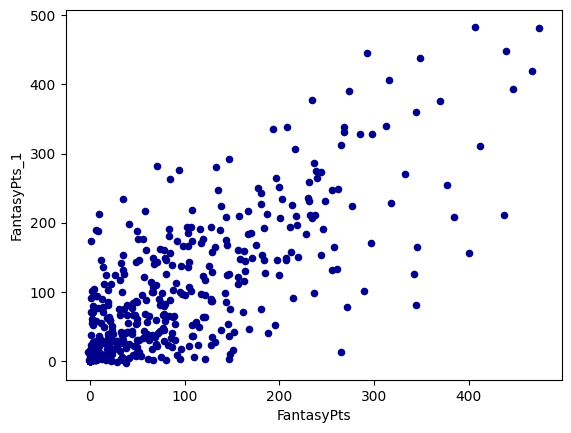

In [137]:
# Quick and simple scatter
ax1 = data.plot.scatter(x='FantasyPts',
                        y='FantasyPts_1',
                        c='DarkBlue')

data['FantasyPts'].corr(data['FantasyPts_1']) # correlation coeff

0.6718392764759592

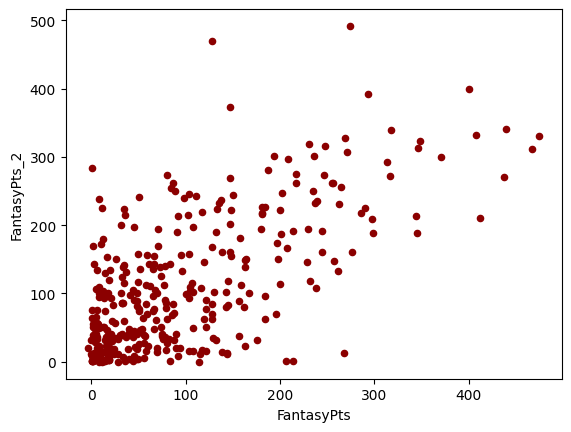

In [138]:
ax2 = data.plot.scatter(x='FantasyPts',
                        y='FantasyPts_2',
                        c='DarkRed')

data['FantasyPts'].corr(data['FantasyPts_2']) # correlation coeff